In [1]:
from fracstack.boxcount import integral_image_d0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from testing_fracstack import temp_bn as bn

In [ ]:
fractal_width = 8192

dynamic_params={'global_min_size': 1,
                     'global_max_size': 100,
                     'min_decade_span': 2,
                     'min_points': 40,
                     'num_sizes': 100,
                     'num_offsets': 100,
                     'min_R2': 0.999, 
                     'stretch': True, 
                     'show_progress': False,
                     'use_plateau_detection': True,
                     'plateau_window': 10,
                     'plateau_tol': 0.01,
                     'plateau_method': 'mean',
                     'pairwise_tol': 0.01,
                     'use_occupancy_filter': True,
                     'occ_low': 0.01,
                     'occ_high': 0.99,
                     'verbose': False}

neuron_params={'depth': 15,
                    'mean_soma_radius': 0,
                    'std_soma_radius': 0,
                    'D': 1.2,
                    'branch_angle': np.pi / 2,
                    'mean_branches': 2,
                    'weave_type': 'Uniform',
                    'randomness': 0,
                    'curviness': 'Gauss',
                    'curviness_magnitude': 0,
                    'n_primary_dendrites': 2,
                    'initial_thickness': 0,
                    'total_length': fractal_width // 2,
                    'htree': True}

network_params = {
    'width': int(fractal_width),
    'height': int(fractal_width),
    'seed_coordinates': [(int(fractal_width // 2), int(fractal_width // 2), 0)], 
    'num_neurons': 1,
    'deterministic': True,
}

network = bn.generate_network(network_params = network_params, 
                              neuron_params = neuron_params)
                              
                              
# network.print_scaling_verification()

# network.neurons[0].dendrite.branch_lengths




In [2]:
import time
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
from fracstack.core import measure_dimension


im2analyze = io.imread('/home/apd/Projects/FracStack/testing_fracstack/test_htree_1.5_15_8192.tif')

# slopes = plot_pairwise_slopes(im2analyze, mode='D0', plot_second_order=True, min_size=2, max_size=1024, num_sizes=100, num_offsets=100, use_optimization=True, sparse_threshold=0.01, use_min_count=False, seed=42, figsize=(11, 11), save_path=None)

start_time = time.perf_counter()

results = measure_dimension(im2analyze, mode='D0', 
                            num_sizes=100, 
                            min_size=2, 
                            max_size=1024, 
                            num_offsets=100,
                            use_integral_image=True,
                            use_bootstrap_ci=True,
                            bootstrap_method='residual',
                            n_bootstrap=1000,
                            bootstrap_seed=42)

end_time = time.perf_counter()

print('\n--------------------------------\n')
print(f"Total time taken with integral image: {end_time - start_time} seconds")
print(f'D0: {results["D"]:.4f}')
print(f'R2: {results["R2"]:.6f}')
print(f'CI: [{results["ci_low"]:.4f}, {results["ci_high"]:.4f}]')
print(f"D = {results["D"]:.4f}  [{results["ci_low"]:.4f} – {results["ci_high"]:.4f}]  ")

start_time = time.perf_counter()

results = measure_dimension(im2analyze, mode='D0', 
                            num_sizes=100, 
                            min_size=2, 
                            max_size=1024, 
                            num_offsets=100,
                            use_integral_image=False,
                            use_bootstrap_ci=True,
                            bootstrap_method='residual',
                            n_bootstrap=1000,
                            bootstrap_seed=42)

end_time = time.perf_counter()

print('\n--------------------------------\n')
print(f"Total time taken without integral image: {end_time - start_time} seconds")
print(f'D0: {results["D"]:.4f}')
print(f'R2: {results["R2"]:.6f}')
print(f'CI: [{results["ci_low"]:.4f}, {results["ci_high"]:.4f}]')
print(f"D = {results["D"]:.4f}  [{results["ci_low"]:.4f} – {results["ci_high"]:.4f}]")


Time taken to build summed area table: 1.0821999240006335 seconds
Time taken to compute box counts: 47.616357775000324 seconds

--------------------------------

Total time taken with integral image: 49.21643987799962 seconds
D0: 1.4724
R2: 0.999857
CI: [1.4634, 1.4842]
D = 1.4724  [1.4634 – 1.4842]  

--------------------------------

Total time taken without integral image: 45.09320405800008 seconds
D0: 1.4724
R2: 0.999858
CI: [1.4633, 1.4842]
D = 1.4724  [1.4633 – 1.4842]


  D0 Mode: Using box counts directly for occupancy
  Original scales: 100 sizes from 9.0 to 1517.0
  Occupancy range: 0.0068 to 0.0710
  No scales excluded by occupancy filter
  Retained scale range: 9.0 to 1517.0
  Input data for plateau detection: 100 scales
  Scale range: 9.0 to 1517.0
  Plateau method: pairwise_first
  Two-point slopes range: -5.5675 to 0.0000
  Median slope: -1.5060
  Median tolerance threshold: ±30.0% of |median_slope| = ±0.4518
  Pairwise slope differences range: 0.0000 to 5.5675
  Pairwise tolerance threshold: 5.0% of |median_slope| = 0.0753
  Stable pairwise slopes: 8/98 (8.2%)
  Stable slopes (median): 48/99 (48.5%)
  Stable regions at indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 22 23 24 27 28
 29 30 31 32 33 34 37 38 39 40 41 42 43 45 46 48 51 57 59 60 67 69 71 81]
PLATEAU DETECTION FAILED
Plateau method tried: pairwise_first
Data points available: 100
Slope statistics:
  • Median slope: -1.5060
  • Slope range: -5.5675 to 0.0000
  • S

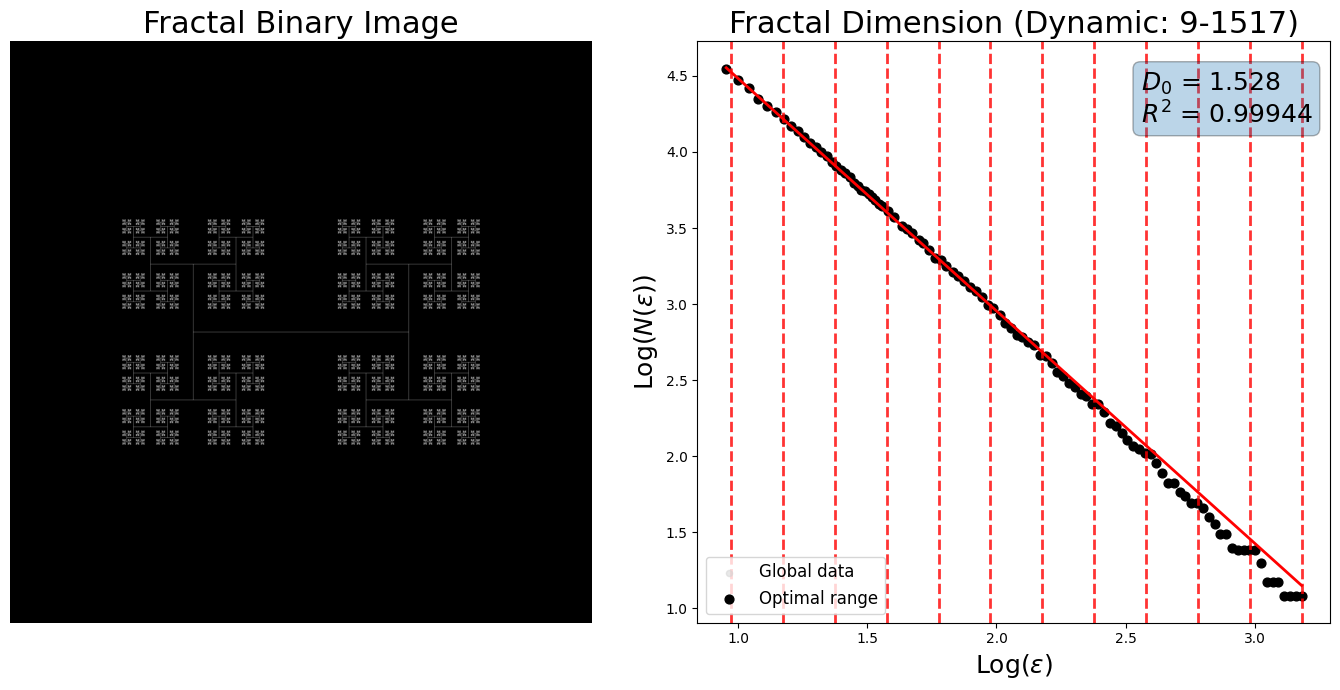

D0: 1.5283
R2: 0.999439
CI: [1.5159, 1.5404]
D0 = 1.5283  [1.5159 – 1.5404]


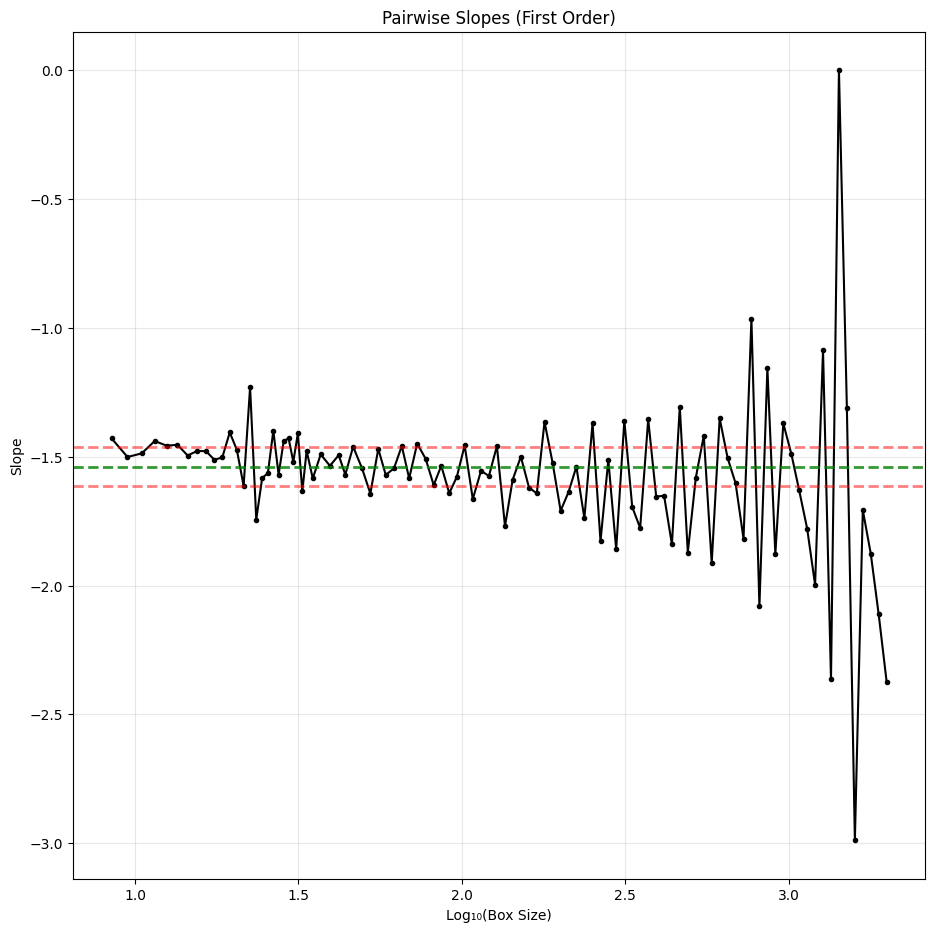

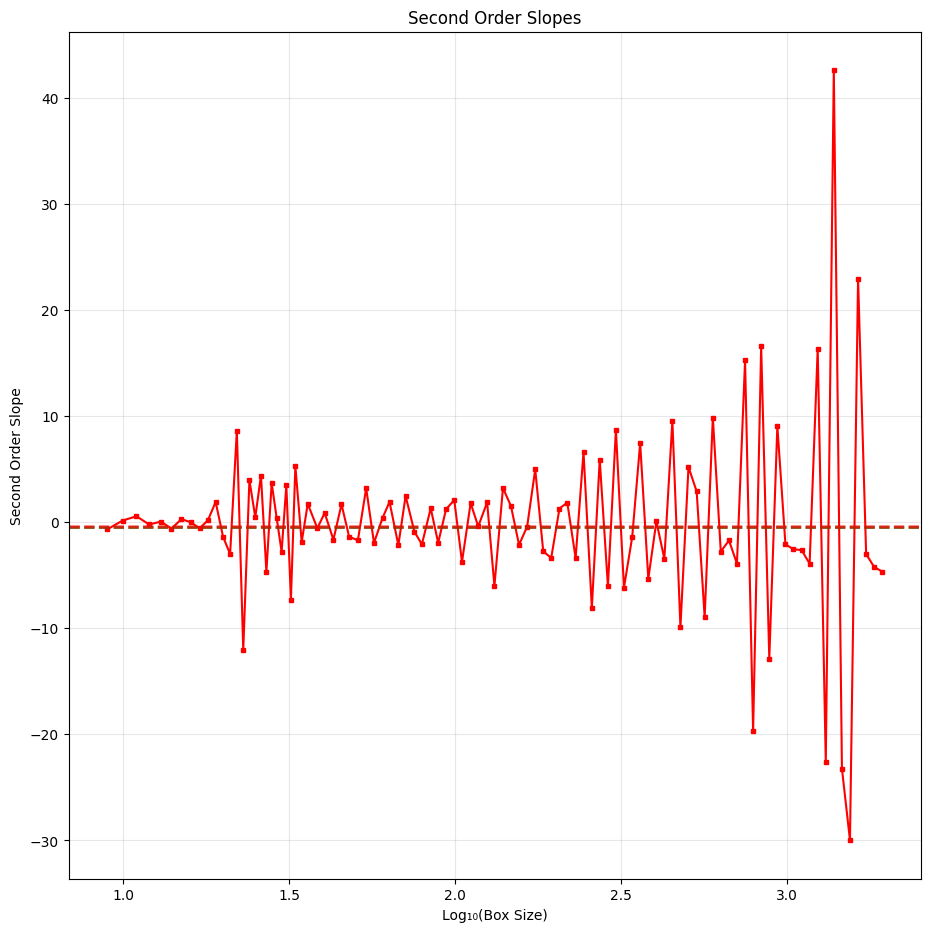

In [ ]:
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
from temp_core import measure_dimension, portfolio_plot, plot_pairwise_slopes
import temp_bn as bn

# im2analyze = io.imread('test_htree_1.2_15_8192.tif')

fractal_width = 8192

neuron_params={'depth': 15,
                    'mean_soma_radius': 0,
                    'std_soma_radius': 0,
                    'D': 1.5,
                    'branch_angle': np.pi / 2,
                    'mean_branches': 2,
                    'weave_type': 'Uniform',
                    'randomness': 0,
                    'curviness': 'Gauss',
                    'curviness_magnitude': 0,
                    'n_primary_dendrites': 2,
                    'initial_thickness': 0,
                    'total_length': fractal_width // 2,
                    'htree': True}

network_params = {
    'width': int(fractal_width),
    'height': int(fractal_width),
    'seed_coordinates': [(int(fractal_width // 2), int(fractal_width // 2), 0)], 
    'num_neurons': 1,
    'deterministic': True,
}

network = bn.generate_network(network_params = network_params, 
                              neuron_params = neuron_params)
dynamic_params={'global_min_size': 9,
                     'global_max_size': 1517,
                     'min_decade_span': 2,
                     'min_points': 20,
                     'num_sizes': 100,
                     'num_offsets': 100,
                     'min_R2': 0.999, 
                     'stretch': True, 
                     'show_progress': False,
                     'use_plateau_detection': True,
                     'plateau_window': 5,
                     'plateau_tol': 0.30,
                     'plateau_method': 'pairwise_first',
                     'pairwise_tol': 0.05,
                     'use_occupancy_filter': True,
                     'occ_low': 0.001,
                     'occ_high': 0.999,
                     'verbose': True}

im2analyze = network.filled_mask
branch_lengths = network.neurons[0].dendrite.branch_lengths
branch_lengths = branch_lengths[branch_lengths > 8]

results = portfolio_plot(input_array=im2analyze,
                             compute_dimensions='D0',
                            #  custom_sizes=branch_lengths,
                             num_sizes=100,
                             min_size=9,
                             max_size=1517,
                             num_offsets=100,
                             use_min_count=True,
                             use_bootstrap_ci=True,
                             use_weighted_fit=True,
                             bootstrap_method='residual',
                             n_bootstrap=10000,
                             bootstrap_seed=42,
                             use_dynamic=True,
                             dynamic_params=dynamic_params,
                             vertical_lines=branch_lengths
                             )


D0 = results['D0']
R2 = results['D0_R2']
ci_low = results['D0_ci_low']
ci_high = results['D0_ci_high']

print(f"D0: {D0:.4f}")
print(f"R2: {R2:.6f}")
print(f"CI: [{ci_low:.4f}, {ci_high:.4f}]")

print(f"D0 = {D0:.4f}  [{ci_low:.4f} – {ci_high:.4f}]")



slopes = plot_pairwise_slopes(im2analyze, mode='D0', variation_band_threshold=0.3, plot_second_order=True, min_size=8, max_size=2048, num_sizes=100, num_offsets=100, use_optimization=True, sparse_threshold=0.01, use_min_count=False, seed=42, figsize=(11, 11), save_path=None)







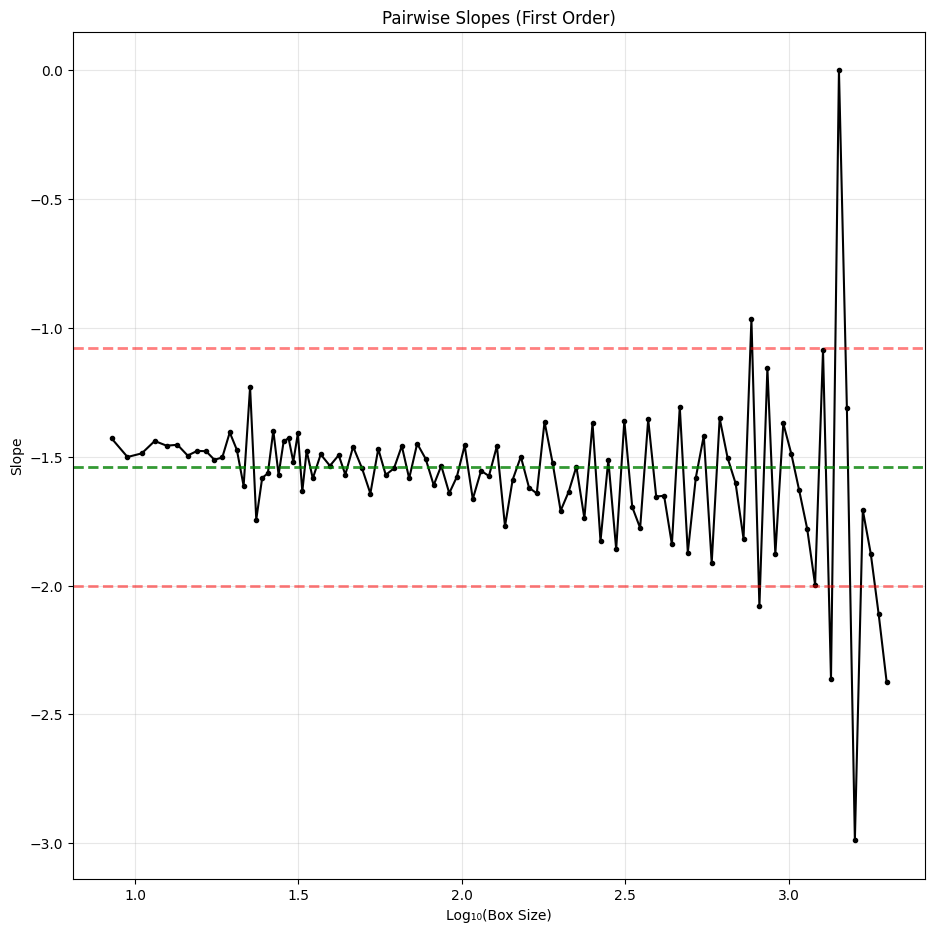

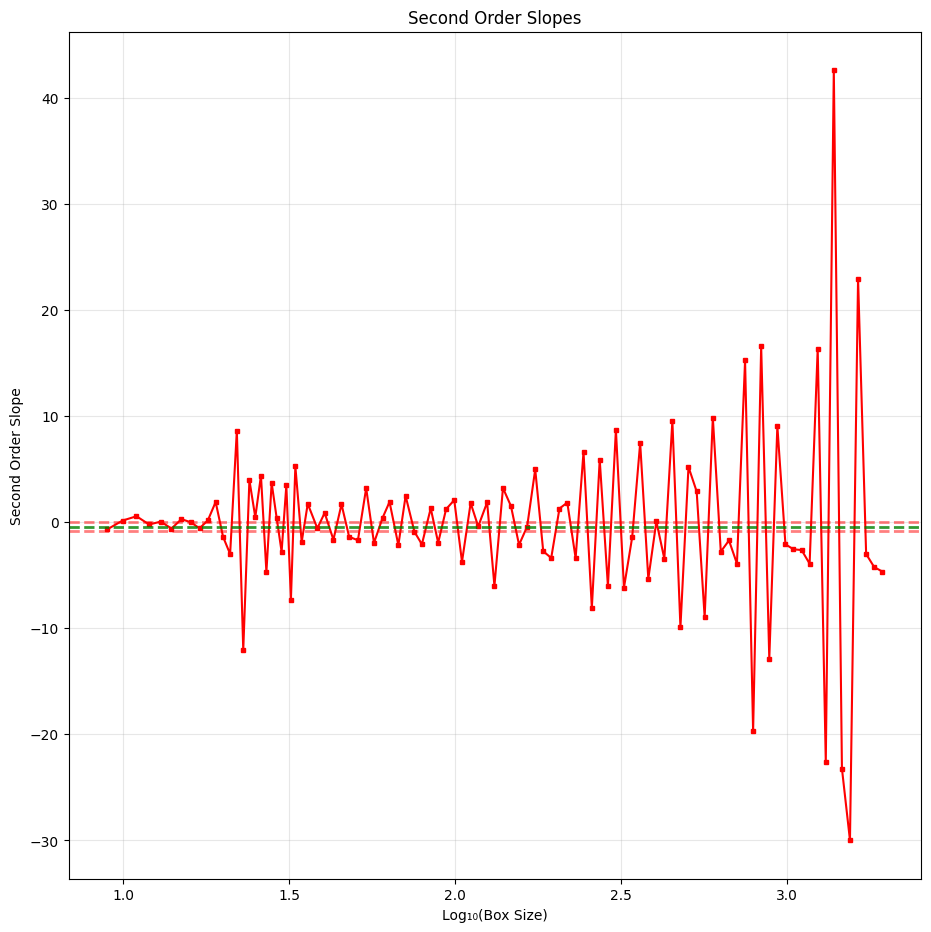

In [3]:
slopes = plot_pairwise_slopes(im2analyze, mode='D0', variation_band_threshold=0.3, plot_second_order=True, min_size=8, max_size=2048, num_sizes=100, num_offsets=100, use_optimization=True, sparse_threshold=0.01, use_min_count=False, seed=42, figsize=(11, 11), save_path=None)



In [ ]:
fractal_width = 8192

dynamic_params={'global_min_size': 1,
                     'global_max_size': 100,
                     'min_decade_span': 2,
                     'min_points': 40,
                     'num_sizes': 100,
                     'num_offsets': 100,
                     'min_R2': 0.999, 
                     'stretch': True, 
                     'show_progress': False,
                     'use_plateau_detection': True,
                     'plateau_window': 10,
                     'plateau_tol': 0.01,
                     'plateau_method': 'mean',
                     'pairwise_tol': 0.01,
                     'use_occupancy_filter': True,
                     'occ_low': 0.01,
                     'occ_high': 0.99,
                     'verbose': False}

neuron_params={'depth': 15,
                    'mean_soma_radius': 0,
                    'std_soma_radius': 0,
                    'D': 1.2,
                    'branch_angle': np.pi / 2,
                    'mean_branches': 2,
                    'weave_type': 'Uniform',
                    'randomness': 0,
                    'curviness': 'Gauss',
                    'curviness_magnitude': 0,
                    'n_primary_dendrites': 2,
                    'initial_thickness': 0,
                    'total_length': fractal_width // 2,
                    'htree': True}

network_params = {
    'width': int(fractal_width),
    'height': int(fractal_width),
    'seed_coordinates': [(int(fractal_width // 2), int(fractal_width // 2), 0)], 
    'num_neurons': 1,
    'deterministic': True,
}

network = bn.generate_network(network_params = network_params, 
                              neuron_params = neuron_params)
                              
                              
network.print_scaling_verification()





  D0 Mode: Using box counts directly for occupancy
  Original scales: 100 sizes from 1.0 to 630.0
  Occupancy range: 0.0072 to 0.1455
  No scales excluded by occupancy filter
  Retained scale range: 1.0 to 630.0
  Input data for plateau detection: 100 scales
  Scale range: 1.0 to 630.0
  Plateau method: median
  Two-point slopes range: -4.9092 to 2.3444
  Median slope: -1.5361
  Median tolerance threshold: ±50.0% of |median_slope| = ±0.7681
  Stable slopes (median): 72/99 (72.7%)
  Stable regions at indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 43 48 52 53 54 55 58 64 65 66
 67 68 69 70 71 74 75 76 77 79 80 81 82 83 84 85 86 87 88 91 93 95 96 97]
  FAILED: No stable plateau found with current parameters
  Try adjusting plateau_window (currently 5) or plateau_tol (currently 0.5)


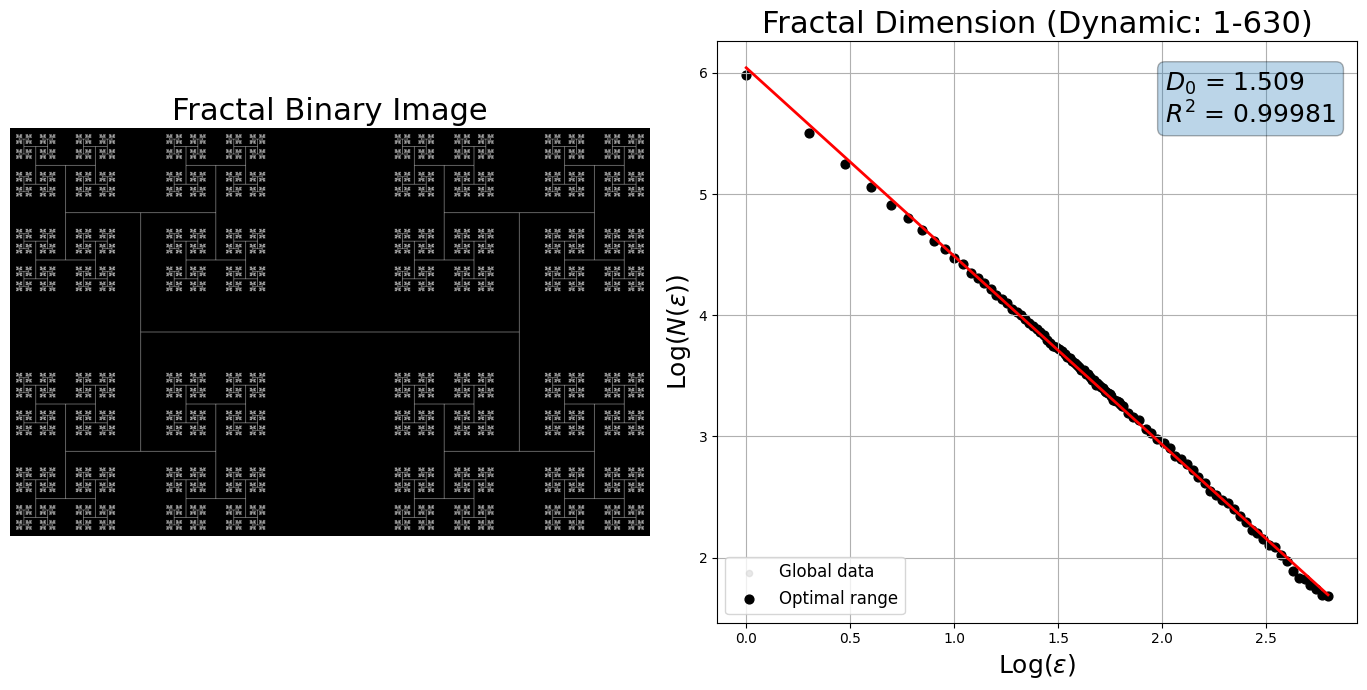

D0: 1.5085
R2: 0.999805
CI: [1.4953, 1.5286]
D0 = 1.5085  [1.4953 – 1.5286]


In [1]:
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
from temp_core import measure_dimension, portfolio_plot

im2analyze = io.imread('test_htree_1.5_15_8192.tif')


dynamic_params={'global_min_size': 1,
                     'global_max_size': int(10**2.8),
                     'min_decade_span': 2,
                     'min_points': 40,
                     'num_sizes': 100,
                     'num_offsets': 100,
                     'min_R2': 0.999, 
                     'stretch': True, 
                     'show_progress': False,
                     'use_plateau_detection': True,
                     'plateau_window': 5,
                     'plateau_tol': 0.5,
                     'plateau_method': 'median',
                     'pairwise_tol': 0.5,
                     'use_occupancy_filter': True,
                     'occ_low': 0.001,
                     'occ_high': 0.95,
                     'verbose': True}



results = portfolio_plot(input_array=im2analyze,
                             compute_dimensions='D0',
                             num_sizes=100,
                             min_size=8,
                             max_size=2048,
                             num_offsets=100,
                             use_min_count=True,
                             use_bootstrap_ci=True,
                             bootstrap_method='residual',
                             n_bootstrap=10000,
                             bootstrap_seed=42,
                             use_dynamic=True,
                             dynamic_params=dynamic_params
                             )


D0 = results['D0']
R2 = results['D0_R2']
ci_low = results['D0_ci_low']
ci_high = results['D0_ci_high']

print(f"D0: {D0:.4f}")
print(f"R2: {R2:.6f}")
print(f"CI: [{ci_low:.4f}, {ci_high:.4f}]")

print(f"D0 = {D0:.4f}  [{ci_low:.4f} – {ci_high:.4f}]")










In [ ]:
D0 = results['D0']
R2 = results['D0_R2']
ci_low = results['D0_ci_low']
ci_high = results['D0_ci_high']

print(f"D0: {D0:.4f}")
print(f"R2: {R2:.6f}")
print(f"CI: [{ci_low:.4f}, {ci_high:.4f}]")

print(f"D0 = {D0:.4f}  [{ci_low:.4f} – {ci_high:.4f}]  "
      f"(OLS would give { -np.polyfit(np.log10(results["valid_sizes"]), np.log10(results["valid_counts"]),1)[0]:.4f})")

